In [34]:
import pandas as pd
import polaris as po
import seaborn as sns
import yellowbrick
import rdkit.Chem as Chem
from admet_ai import ADMETModel
import numpy as np


In [ ]:
model = ADMETModel()
predictors = ['BBB_Martins', 
              'Bioavailability_Ma',
 'CYP1A2_Veith',
 'CYP2C19_Veith',
 'CYP2C9_Substrate_CarbonMangels',
 'CYP2C9_Veith',
 'CYP2D6_Substrate_CarbonMangels',
 'CYP2D6_Veith',
 'CYP3A4_Substrate_CarbonMangels',
 'CYP3A4_Veith',
  'PAMPA_NCATS',
 'Pgp_Broccatelli',
 'Caco2_Wang',
 'Clearance_Hepatocyte_AZ',
 'Clearance_Microsome_AZ',
 'Half_Life_Obach',
 'HydrationFreeEnergy_FreeSolv',
'Lipophilicity_AstraZeneca',
 'PPBR_AZ',
 'Solubility_AqSolDB',
 'VDss_Lombardo',
 'molecular_weight', 'logP', 'hydrogen_bond_acceptors',
       'hydrogen_bond_donors', 'tpsa',
]






/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=la

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

RDKit fingerprints:   0%|          | 0/126 [00:00<?, ?it/s]<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Pytho

In [ ]:
ds_path = 'train_admet_all'


df = pd.read_csv(f'../data/{ds_path}.csv')
train_ix = np.load('../data/train_split_idx.npy')
df.loc[:, 'split'] = ['train' if x else 'val' for x in df.index.isin(train_ix)]



df.loc[:, 'SMILES'] = df['CXSMILES'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))
preds = model.predict(smiles=df.SMILES.values)
df_all = pd.concat([df, preds.loc[:, predictors].reset_index(drop=True)], axis=1)
# df_all.to_csv(f"{ds_path}_admetai.csv", index=False)

RDKit fingerprints:   0%|          | 0/434 [00:00<?, ?it/s]<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Pytho

##  Scale Training targets

In [50]:
epsilon = 1e-8
for col in ['MLM', 'HLM', 'KSOL', 'MDR1-MDCKII']: 
    df_all.loc[:, f"Log{col}"] = np.log10(np.clip(df_all[col], a_min=epsilon, a_max=None))

## Whiten features

/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

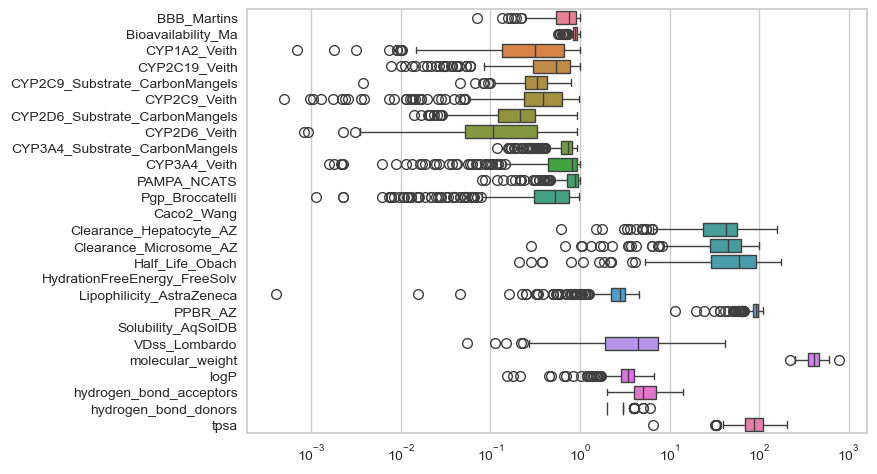

In [54]:
sns.boxplot(df_all.loc[:, predictors], orient='h', log_scale=True)

In [60]:
from sklearn.decomposition import PCA
pca_train = PCA(whiten=True)
X_train = df_all.loc[df_all.split == 'train', predictors].values
X_white_train = pca_train.fit_transform(X_train)
df_all.loc[df_all.split == 'train', [f"{x}_w" for x in predictors]] = X_white_train



pca_val = PCA(whiten=True)
X_val = df_all.loc[df_all.split == 'val', predictors].values
X_white_val = pca_val.fit_transform(X_val)
df_all.loc[df_all.split == 'val', [f"{x}_w" for x in predictors]] = X_white_val

In [65]:
df_train = df_all.loc[:, ['split', 'Molecule Name', 'CXSMILES'] + list(df_all.filter(regex='^Log'))+ [f"{x}_w" for x in predictors]]
df_train.head()
df_train.to_csv('train_admet_all_admetai.csv')

## Test set (for competition)

In [66]:
# ds_path = 'test_admet_all'


# df = pd.read_csv(f'../data/{ds_path}.csv')
# df.loc[:, 'SMILES'] = df['CXSMILES'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))
# preds = model.predict(smiles=df.SMILES.values)
# df_all = pd.concat([df, preds.loc[:, predictors].reset_index(drop=True)], axis=1)
# df_all.to_csv(f"{ds_path}_admetai.csv", index=False)